In [11]:
import math, pulp
import numpy as np
import pandas as pd
from os.path import join as pJoin
from datetime import datetime as dt
from datetime import timedelta, date
import loadForecast as fc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import mpld3
import matplotlib.pyplot as plt
mpld3.enable_notebook()
%matplotlib inline

In [2]:
df = pd.read_csv('Texas_17yr_TempAndLoad.csv', parse_dates=['dates'])
# train model on previous data
all_X = fc.makeUsefulDf(df)
all_y = df['load']
X_test, y_test = all_X[-8760:], all_y[-8760:]
X_train, y_train = all_X[:-8760], all_y[:-8760]

In [3]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [4]:
model = build_model()

In [7]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

EPOCHS = 1

model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


.

In [8]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:5.2f}".format(mse))

Testing set Mean Abs Error: 1591960.50


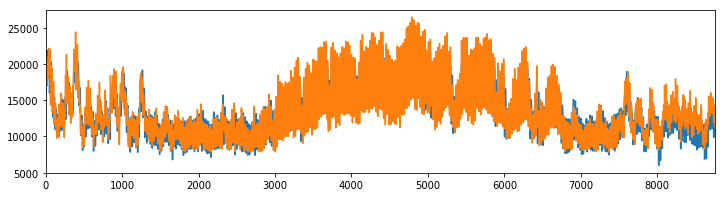

In [12]:
test_predictions = model.predict(X_test).flatten()
pd.Series(test_predictions).plot(figsize=(12, 3))
y_test.index = range(8760)
y_test.plot()

In [10]:
m = [abs((i-j)/j) for i, j in zip(test_predictions, y_test)]
sum(m)/len(m)

0.07304655933433424